In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

# Train dataset

In [2]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# EDA

In [3]:
df.shape

(10683, 11)

We have 10683 rows and 11 columns in the dataset

In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


We can observe that 75% price is way less than max price

In [6]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Target variable is of int type

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Null values are present in the data set

# Dropping null values

In [8]:
df=df.dropna()

# Converting Date type and timestamps type columns in different columns

In [9]:
df['Day'] = pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day
df['Month'] = pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month
df['Year'] = pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.year

In [10]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [11]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [12]:
df=df.drop('Date_of_Journey',axis=1)
df=df.drop('Dep_Time',axis =1)

In [13]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

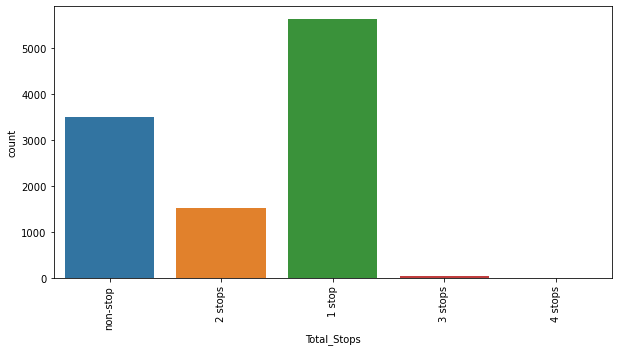

In [14]:
# count the stops visually
plt.figure(figsize=(10,5))
sns.countplot('Total_Stops',data=df)
plt.xticks(rotation=90)

We can observe that mose of the flights have 1 stop only

Converting Flight Stops into numeric values - > 

In [15]:
df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

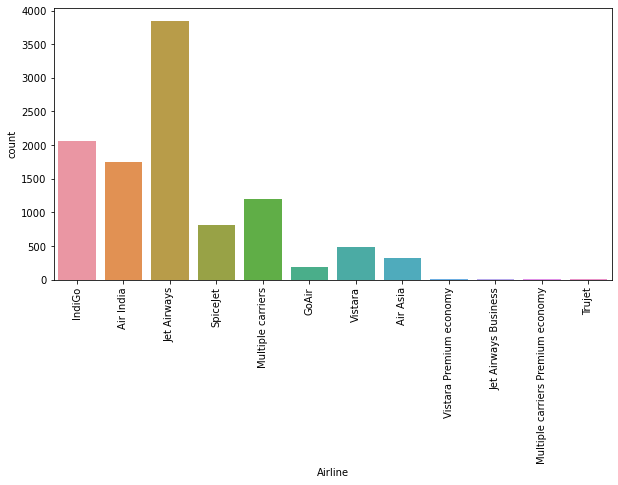

In [16]:
# count the airlines visually
plt.figure(figsize=(10,5))
sns.countplot('Airline',data=df)
plt.xticks(rotation=90)

We can observe most of the flights were from jet Airways

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

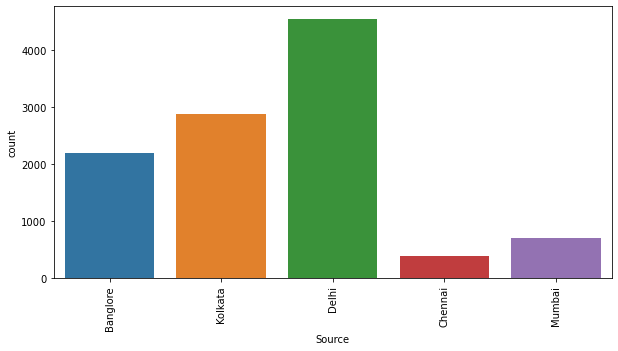

In [17]:
# count the source visually
plt.figure(figsize=(10,5))
sns.countplot('Source',data=df)
plt.xticks(rotation=90)

We can observe mose of the flights were from Delhi

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

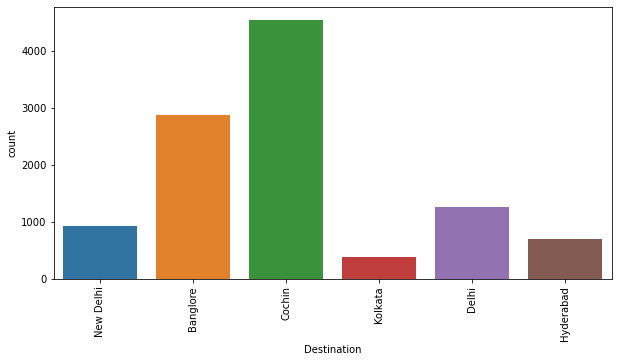

In [18]:
# count the destination visually
plt.figure(figsize=(10,5))
sns.countplot('Destination',data=df)
plt.xticks(rotation=90)

We can observe most of the flights destination was Coachin

# Skewness

In [19]:
df.skew()

Total_Stops     0.317109
Price           1.812405
Day             0.118174
Month          -0.387409
Year            0.000000
Dep_hour        0.112924
Dep_min         0.167234
Arrival_hour   -0.370146
Arrival_min     0.110945
dtype: float64

Only target variable is skewed, We will leave it as it is

# Converting columns into Labels

In [20]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Destination'] =  LE.fit_transform(df['Destination'])
df['Source'] =  LE.fit_transform(df['Source'])
df['Airline'] =  LE.fit_transform(df['Airline'])

In [21]:
df['Duration'] = df['Duration'].str.replace('h ',':').str.replace('m','').str.replace('h',':0')

In [22]:
df['Duration_Hr'],df['Duration_Min'] = df['Duration'].str.split(':',2).str

In [23]:
df.dropna(axis=0,inplace=True)

In [24]:
df=df.drop(['Route','Additional_Info'],axis=1)

In [25]:
df['Duration_Hr']=df['Duration_Hr'].astype(int)
df['Duration_Min']=df['Duration_Min'].astype(int)

In [26]:
df=df.drop('Duration',axis=1)

In [27]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hr,Duration_Min
0,3,0,5,0,3897,24,3,2019,22,20,1,10,2,50
1,1,3,0,2,7662,1,5,2019,5,50,13,15,7,25
2,4,2,1,2,13882,9,6,2019,9,25,4,25,19,0
3,3,3,0,1,6218,12,5,2019,18,5,23,30,5,25
4,3,0,5,1,13302,1,3,2019,16,50,21,35,4,45


<AxesSubplot:xlabel='Month', ylabel='Price'>

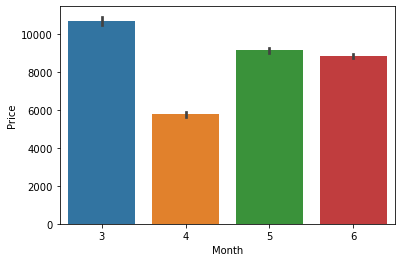

In [28]:
sns.barplot(x='Month',y='Price',data=df)

We can observe that Price was highest on the 3rd month

<AxesSubplot:xlabel='Day', ylabel='Price'>

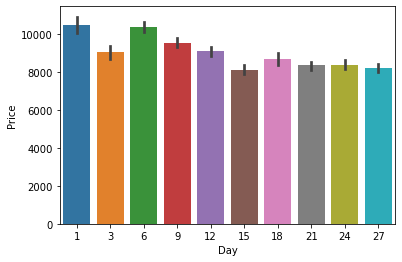

In [30]:
sns.barplot(x='Day',y='Price',data=df)

In the 1st day of the month the flighs are more expensive

<AxesSubplot:xlabel='Year', ylabel='Price'>

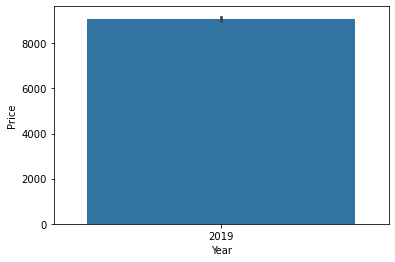

In [32]:
sns.barplot(x='Year',y='Price',data=df)

All the values in Year columns are same, Hence can be dropped

In [33]:
df=df.drop('Year',axis=1)

<AxesSubplot:>

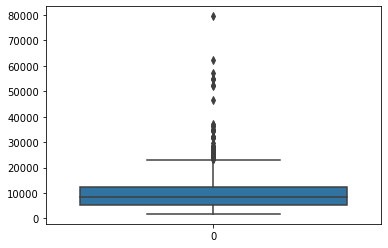

In [34]:
sns.boxplot(data=df['Price'])

Price column contains Outliers

# Replacing outliers 

In [35]:
IQR = df['Price'].quantile(0.75)-df['Price'].quantile(0.25)
Barmax =  df['Price'].quantile(0.75) + 1.5*IQR
Barmin =  df['Price'].quantile(0.25) - 1.5*IQR
df.loc[df['Price']>Barmax,'Price'] = Barmax
df.loc[df['Price']<Barmin,'Price'] = Barmin

# Duplicates

In [36]:
df.duplicated().sum()

222

Dataset contains duplicate values

# Removing duplicates

In [37]:
df.drop_duplicates(keep='first',inplace=True)

# Confirming removal of outliers

In [38]:
df.duplicated().sum()

0

# Test Data set

In [40]:
df1=pd.read_excel('Test_set.xlsx')
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [41]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No null values are present in test dataset

# Performing conversion on test dataset

In [42]:
df1['Day'] = pd.to_datetime(df1.Date_of_Journey,format='%d/%m/%Y').dt.day
df1['Month'] = pd.to_datetime(df1.Date_of_Journey,format='%d/%m/%Y').dt.month
df1['Year'] = pd.to_datetime(df1.Date_of_Journey,format='%d/%m/%Y').dt.year

df1['Dep_hour'] = pd.to_datetime(df1['Dep_Time']).dt.hour
df1['Dep_min'] = pd.to_datetime(df1['Dep_Time']).dt.minute

df1["Arrival_hour"] = pd.to_datetime(df1.Arrival_Time).dt.hour
df1["Arrival_min"] = pd.to_datetime(df1.Arrival_Time).dt.minute
df1.drop(["Arrival_Time"], axis = 1, inplace = True)

df1=df1.drop('Date_of_Journey',axis=1)
df1=df1.drop('Dep_Time',axis =1)


LE = LabelEncoder()
df1['Destination'] =  LE.fit_transform(df1['Destination'])
df1['Source'] =  LE.fit_transform(df1['Source'])
df1['Airline'] =  LE.fit_transform(df1['Airline'])

df1=df1.drop(['Route','Additional_Info'],axis=1)
df1['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)  

df1['Duration'] = df1['Duration'].str.replace('h ',':').str.replace('m','').str.replace('h',':0')
df1['Duration_Hr'],df1['Duration_Min'] = df1['Duration'].str.split(':',2).str

df1['Duration_Hr']=df1['Duration_Hr'].astype(int)
df1['Duration_Min'].fillna(df1['Duration_Min'].mode()[0],inplace=True)
df1['Duration_Min']=df1['Duration_Min'].astype(int)
df1=df1.drop('Duration',axis=1)
df1=df1.drop('Year',axis=1)

In [43]:
df1.head()

,Airline,Source,Destination,Total_Stops,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hr,Duration_Min
0,4,2,1,1,6,6,17,30,4,25,10,55
1,3,3,0,1,12,5,6,20,10,20,4,0
2,4,2,1,1,21,5,19,15,19,0,23,45
3,6,2,1,1,21,5,8,0,21,0,13,0
4,0,0,2,0,24,6,23,55,2,45,2,50


In [44]:
df.shape,df1.shape

((10459, 13), (2671, 12))

Test dataset doesnot contains target variable

# Train-Test-Split

In [46]:
x = df.drop(['Price'],axis=1)
y= df['Price']

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    pred=regr.predict(x_test)
    acc = r2_score(y_test, pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best R2 Score is",maxAccu,"on Random State",maxRS)

Best R2 Score is 0.5138174619019091 on Random State 29


In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=29)

# model building

-------- Linear Regression --------

In [49]:
from sklearn import metrics
regr = LinearRegression()
regr.fit(x_train, y_train)
pred=regr.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.5138174619019091
MAE: 2344.792888562396
MSE: 9098171.584721968
RMSE: 3016.3175536939025


--------Ridge--------

In [50]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
pred=rr.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.5138172861468562
MAE: 2344.7934038744734
MSE: 9098174.87371222
RMSE: 3016.3180988934537


--------lasso--------

In [51]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred=model_lasso.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.51381702012087
MAE: 2344.7934940768614
MSE: 9098179.851986589
RMSE: 3016.3189241170417


--------Elastic net--------

In [52]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 
pred=model_enet.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.5131097025876206
MAE: 2346.7996068784405
MSE: 9111416.230873333
RMSE: 3018.5122545507966


--------Decision tree--------

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('R2 score', r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.7265983537569727
MAE: 1329.7052262587633
MSE: 5116298.702942425
RMSE: 2261.9236731027036


--------Random Forest--------

In [54]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred1=rdr.predict(x_test)
print('R2 score',r2_score(y_test, pred1))
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

R2 score 0.8305845053019395
MAE: 1142.0085467869535
MSE: 3170354.9985633716
RMSE: 1780.549072214347


# Cross Validation Score

In [55]:
print("Cross validation score:",cross_val_score(regr,x,y,cv=5).mean())

Cross validation score: 0.4847724838962275


linear regression : 0.48

In [56]:
print("Cross validation score:",cross_val_score(rr,x,y,cv=5).mean())

Cross validation score: 0.4847724842599005


ridge : 0.48

In [57]:
print("Cross validation score:",cross_val_score(model_lasso,x,y,cv=5).mean())

Cross validation score: 0.4847724843367517


lasso : 0.48

In [58]:
print("Cross validation score:",cross_val_score(model_enet,x,y,cv=5).mean())

Cross validation score: 0.4846801134716664


elastic net : 0.48

In [59]:
print("Cross validation score:",cross_val_score(dtr,x,y,cv=5).mean())

Cross validation score: 0.7198829128173758


Decision tree : 0.71

In [60]:
print("Cross validation score:",cross_val_score(rdr,x,y,cv=5).mean())

Cross validation score: 0.8202118507320743


Random Forest : 0.82

We can observe that best performing model is random forest, Hence we will select random forest for hyper parameter tuning

# Parameter Hypertuning

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameter = {
 'max_depth': [100, 400, 800],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 400, 800]
}
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5)


In [63]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [100, 400, 800],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400, 800]})

In [64]:
GCV.best_params_

{'max_depth': 800,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

# Buidling Final model

In [65]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(max_depth= 800,
min_samples_leaf= 1,
min_samples_split= 2,
n_estimators= 400)
rdr.fit(x_train,y_train)
pred1=rdr.predict(x_test)
print('R2 score',r2_score(y_test, pred1))
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

R2 score 0.8313739492652186
MAE: 1139.730678500497
MSE: 3155581.747630639
RMSE: 1776.3957181975638


# Predicting using final model for test dataset

In [66]:
pred=rdr.predict(df1)

In [69]:
predictions = pd.DataFrame({'Fares': pred})

In [70]:
predictions

,Fares
0,10987.506167
1,4280.531875
2,14040.325976
3,10579.452119
4,3508.872500
...,...
2666,10214.157500
2667,4519.318333
2668,15605.528833
2669,11738.117500


# Saving to excel

In [72]:
predictions.to_excel("Submission.xlsx")

# saving the model

In [73]:
import joblib
joblib.dump(rdr,"Flight price.pkl")


['Flight price.pkl']